<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise5_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use sklearn.neighbors.KNeighborsClassifier() to fit separate predictive kNN models based on 100 brain regions of interest (see ‘n_rois’ argument for datasets.fetch_atlas_schaefer_2018) using n_neighbors=1,2,3,4,…10 and based on the full 100% of the 100 structural brain scans to predict sex. Next, evaluate each fitted kNN model on same the 100 structural brain scans and retrieve classification accuracy in XX.YY%. Please plot the classification accuracy on the test set (x axis=the different atlas resolutions, y axis=prediction accuracy on test set). [Think
about why kNN shows this performance behavior as a function of its hyperparameter k!]

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 2.0 MB/s 


In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # we fix this to 100 rois
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females and 0 for males

/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)



Dataset created in /root/nilearn_data/oasis1



Downloaded 897622016 of 905208634 bytes (99.2%,    0.5s remaining) ...done. (59 seconds, 0 min)
Extracting data from /root/nilearn_data/oasis1/adcb228c7b26ed4f4fba93bd32bf8d97/archive_dartel.tgz..... done.
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)



Dataset created in /root/nilearn_data/schaefer_2018



 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# We prepare the models 
knn = KNeighborsClassifier

In [ ]:
# We define the iterating variable
neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# We pre-allocate the variables we want to populate with accuracy scores
knn_tr_acc = []
knn_test_acc = []

In [ ]:
# We're ready to iterate
for x in neighbours:

    X, y = input_variables, output_variable
    X_scaled = scaler.fit_transform(X)

    kNN = knn(n_neighbors=(x)).fit(X,y) # We fit the kNN training model
    score_k = kNN.score(X, y)
    score_k = np.multiply(score_k, 100) 
    knn_tr_acc.append(score_k) # We store the scores
    print('kNN training accuracy: %.2f' % ((score_k))) # We print the scores


kNN training accuracy: 100.00
kNN training accuracy: 83.00
kNN training accuracy: 79.00
kNN training accuracy: 79.00
kNN training accuracy: 72.00
kNN training accuracy: 73.00
kNN training accuracy: 66.00
kNN training accuracy: 71.00
kNN training accuracy: 70.00
kNN training accuracy: 73.00


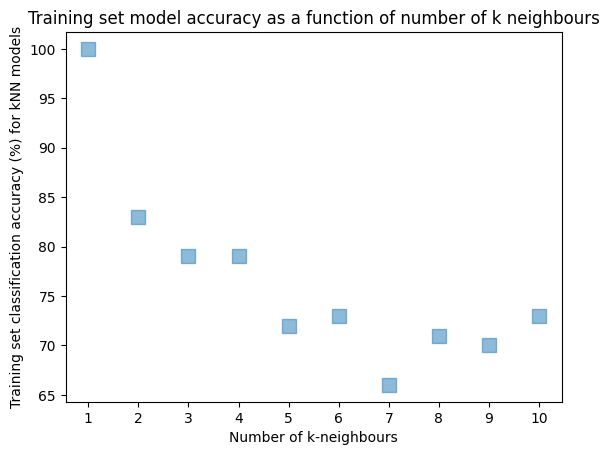

In [ ]:
# We're ready to plot
plt.style.use("default")
plt.scatter(neighbours,knn_tr_acc, s=100, alpha = 0.5, marker = 's')
plt.gca().set(
    title="Training set model accuracy as a function of number of k neighbours",
    xlabel="Number of k-neighbours",
    ylabel="Training set classification accuracy (%) for kNN models",
    xticks = (neighbours)
)
plt.show()

When k-neighbours = 1 we overfit the data, which is why we get a perfect training accuracy score. As k-neighbours increases, we lose accuracy, probably because we incur progressively higher bias. 